In [851]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.stem import WordNetLemmatizer
warnings.filterwarnings("ignore")

In [852]:
emotions_df=pd.read_csv("/content/drive/MyDrive/NLP Project/emotions.csv")

In [853]:
emotions_df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [854]:
violence_df=pd.read_csv("/content/drive/MyDrive/NLP Project/TrainViolation.csv")

In [855]:
violence_df.head()

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence


In [856]:
hate_df=pd.read_csv("/content/drive/MyDrive/NLP Project/hatespeech.csv")

In [857]:
hate_df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


**Data preprocessing**

In [858]:
emotions_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [859]:
violence_df.drop(['Tweet_ID'],axis=1,inplace=True)

In [860]:
hate_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [861]:
emotions_df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [862]:
violence_df.head()

,tweet,type
0,Had a dream i got raped last night. By a guy i...,sexual_violence
1,he thought the word raped means sex and told m...,sexual_violence
2,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,Chessy Prout can do better by telling the trut...,sexual_violence


In [863]:
hate_df=hate_df[['tweet','class']]

In [864]:
hate_df.head()

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [865]:
emotions_df.columns, violence_df.columns, hate_df.columns

(Index(['text', 'label'], dtype='object'),
 Index(['tweet', 'type'], dtype='object'),
 Index(['tweet', 'class'], dtype='object'))

In [866]:
##Renamingn the columns

In [867]:
violence_df.rename(columns={'tweet':'text','type':'label'},inplace=True)
hate_df.rename(columns={'tweet': 'text','class':'label'},inplace=True)

In [868]:
emotions_df.columns, violence_df.columns, hate_df.columns

(Index(['text', 'label'], dtype='object'),
 Index(['text', 'label'], dtype='object'),
 Index(['text', 'label'], dtype='object'))

In [869]:
#checking the null values

In [870]:
emotions_df.isna().sum(), violence_df.isna().sum(), hate_df.isna().sum()

(text     0
 label    0
 dtype: int64,
 text     0
 label    0
 dtype: int64,
 text     0
 label    0
 dtype: int64)

In [871]:
print(emotions_df.shape)
print(violence_df.shape)
print(hate_df.shape)

(416809, 2)
(39650, 2)
(24783, 2)


In [872]:
#undersampling by extraction


In [873]:
emotions_df['label'].value_counts()

,count
label,
1,141067
0,121187
3,57317
4,47712
2,34554
5,14972


In [874]:
violence_df['label'].value_counts()

,count
label,
sexual_violence,32648
Physical_violence,5946
emotional_violence,651
economic_violence,217
Harmful_Traditional_practice,188


In [875]:
em_df=pd.DataFrame()
for i in range(6):
   em_df=pd.concat([em_df,emotions_df[emotions_df['label']==i].sample(2000, random_state=42, replace=True)])

In [876]:
em_df.head()

,text,label
53879,im feeling terrible,0
3028,i am lbs overweight and the sudden burst of tr...,0
356319,i usually feel resigned that if i know it i kn...,0
412305,i was a part of that group but i left due to f...,0
379058,i am so far from normal that it s not funny i ...,0


In [877]:
em_df.shape

(12000, 2)

In [878]:
emotions_df=em_df.copy()

In [879]:
emotions_df.shape

(12000, 2)

In [880]:
hate_df['label'].value_counts()

,count
label,
1,19190
2,4163
0,1430


In [881]:
emotions_df['label'].value_counts()

,count
label,
0,2000
1,2000
2,2000
3,2000
4,2000
5,2000


In [882]:
emotions_df.shape

(12000, 2)

In [883]:
emotions_df.head()

,text,label
53879,im feeling terrible,0
3028,i am lbs overweight and the sudden burst of tr...,0
356319,i usually feel resigned that if i know it i kn...,0
412305,i was a part of that group but i left due to f...,0
379058,i am so far from normal that it s not funny i ...,0


In [884]:
sexual_violence=violence_df[violence_df['label']=='sexual_violence'].sample(4998, random_state=42)
violence_df=violence_df[violence_df['label']!='sexual_violence']

In [885]:
violence_df=pd.concat([violence_df,sexual_violence], axis=0)

In [886]:
violence_df['label'].value_counts()

,count
label,
Physical_violence,5946
sexual_violence,4998
emotional_violence,651
economic_violence,217
Harmful_Traditional_practice,188


In [887]:
violence_df.shape

(12000, 2)

In [888]:
offensive_language=hate_df[hate_df['label']==1].sample(6407, random_state=42)
hate_df=hate_df[hate_df['label']!=1]

In [ ]:
hate_df['label'].value_counts()

In [889]:
hate_df=pd.concat([hate_df,offensive_language], axis=0)

In [890]:
hate_df.shape

(12000, 2)

In [891]:
emotions_df.head()

,text,label
53879,im feeling terrible,0
3028,i am lbs overweight and the sudden burst of tr...,0
356319,i usually feel resigned that if i know it i kn...,0
412305,i was a part of that group but i left due to f...,0
379058,i am so far from normal that it s not funny i ...,0


In [892]:
violence_df.head()

,text,label
6,"My Husband Beats Me Frequently, Wife Tells Cou...",Physical_violence
29,"Best thing for me to do, is remain silent when...",Physical_violence
30,"My husband will never beat me, Bambam denies r...",Physical_violence
33,"theyre like, i just wanna be a baby maker with...",Physical_violence
35,"I was in England for a week, the longest I’ve ...",Physical_violence


In [893]:
hate_df.head()

,text,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
40,""" momma said no pussy cats inside my doghouse """,2
63,"""@Addicted2Guys: -SimplyAddictedToGuys http://...",2
66,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woo...",2
67,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these...",2


**Label Encoding **

In [894]:
from sklearn.preprocessing import LabelEncoder

In [895]:
labelencoder=LabelEncoder()
violence_df['label']=labelencoder.fit_transform(violence_df['label'])

In [896]:
violence_df['label'].unique()

array([1, 3, 0, 2, 4])

**Stopword removal**

In [897]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [898]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [899]:
stop_words=set(stopwords.words('english'))


In [900]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [901]:
len(stop_words)

198

In [902]:
def remove_stopwords(text):
  all_tokens=nltk.word_tokenize(text)
  filtered_words=[words for words in all_tokens if words.lower() not in stop_words]
  return ' '.join(filtered_words)



In [903]:
emotions_df['text']=emotions_df['text'].apply(remove_stopwords)

In [904]:
violence_df['text']=violence_df['text'].apply(remove_stopwords)

In [905]:
hate_df['text']=hate_df['text'].apply(remove_stopwords)

In [906]:
emotions_df.head()

,text,label
53879,im feeling terrible,0
3028,lbs overweight sudden burst training left feel...,0
356319,usually feel resigned know know late,0
412305,part group left due feeling disheartened inter...,0
379058,far normal funny feel stupid tiny cheated,0


**Tokenizer **


In [907]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(pd.concat([emotions_df['text'],violence_df['text'],hate_df['text']]))

In [908]:
emotion_sequences=tokenizer.texts_to_sequences(emotions_df['text'])
violence_sequences=tokenizer.texts_to_sequences(violence_df['text'])
hate_sequences=tokenizer.texts_to_sequences(hate_df['text'])

In [909]:
emotions_df['text'].iloc[2]

'usually feel resigned know know late'

In [910]:
emotion_sequences[2:3]

[[573, 1, 3609, 16, 16, 636]]

Pad Sequence:
  reason to use: To convert each sentance have the same length ( same no of words )

In [911]:
max_length=50
emotion_padded=pad_sequences(emotion_sequences,maxlen=max_length,padding='post',truncating='post')
violence_padded=pad_sequences(violence_sequences,maxlen=max_length,padding='post',truncating='post')
hate_padded=pad_sequences(hate_sequences, maxlen=max_length,padding='post',truncating='post')

In [912]:
emotion_padded[2:5]

array([[  573,     1,  3609,    16,    16,   636,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [  286,   767,   180,   878,     7,  2458,  1216,  3267,  1312,
          183,   502,   574,   491,    18,  1902,   767, 17139,  4350,
           41,  1556,  1111,    18,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0],
       [  446,   747,   213,     1,   325,  2658,   826,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,    

**Generating Labels and numpy array format**

In [913]:
emotions_df['label']

,label
53879,0
3028,0
356319,0
412305,0
379058,0
...,...
283818,5
49041,5
285547,5
340233,5


In [914]:
emotion_labels=np.array(emotions_df['label'])
violence_labels=np.array(violence_df['label'])
hate_labels=np.array(hate_df['label'])

In [915]:
emotion_labels

array([0, 0, 0, ..., 5, 5, 5])

**Model Defination**

In [916]:
emotion_input=emotion_padded
violence_input=violence_padded
hate_input=hate_padded

In [917]:
#defining multiple input layer for each task
emotion_input_layer=keras.layers.Input(shape=(max_length,), name='emotion_input')
violence_input_layer=keras.layers.Input(shape=(max_length,), name='violence_input')
hate_input_layer=keras.layers.Input(shape=(max_length,), name='hate_input')

In [918]:
#Shared embedding layers
embedding_layer=keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1,output_dim=128,input_length=max_length,name='embedding_layer')

In [919]:
#Apply the emv=bedding layer for each input
emotion_embedded=embedding_layer(emotion_input_layer)
violence_embedded=embedding_layer(violence_input_layer)
hate_embedded=embedding_layer(hate_input_layer)

In [920]:
#LSTM Layer
shared_lstm=keras.layers.LSTM(64, return_sequences=True, name='shared_lstm') #same lstm layer is applied on three task, background we have samwe ;ayer working for three different data

In [921]:
emotion_lstm=shared_lstm(emotion_embedded)
violence_lstm=shared_lstm(violence_embedded)
hate_lstm=shared_lstm(hate_embedded)

In [922]:
#shared pooling and dropout layer
shared_pooling=keras.layers.GlobalMaxPooling1D(name='shared_pooling')
shared_dropout=keras.layers.Dropout(0.5, name='shared_dropout')

In [923]:
emotion_features=shared_dropout(shared_pooling(emotion_lstm))
violence_features=shared_dropout(shared_pooling(violence_lstm))
hate_features=shared_dropout(shared_pooling(hate_lstm))

In [924]:
len(emotions_df['label'].unique()), len(violence_df['label'].unique()), len(hate_df['label'].unique())

(6, 5, 3)

In [925]:
#output layer
emotion_output=keras.layers.Dense(6, activation='softmax', name='emotion_output')(emotion_features)
violence_output=keras.layers.Dense(5, activation='softmax', name='violence_output')(violence_features)
hate_output=keras.layers.Dense(3, activation='softmax', name='hate_output')(hate_features)

In [926]:
#complie the model
model=keras.models.Model(inputs=[emotion_input_layer,violence_input_layer,hate_input_layer], outputs=[emotion_output,violence_output,hate_output])

model.compile(optimizer='adam', loss={'emotion_output':'sparse_categorical_crossentropy',
                                       'violence_output':'sparse_categorical_crossentropy',
                                        'hate_output':'sparse_categorical_crossentropy'}, metrics={'emotion_output':'accuracy',
                                       'violence_output':'accuracy',
                                        'hate_output':'accuracy'})

In [927]:
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ emotion_input       │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ violence_input      │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hate_input          │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_layer     │ (None, 50, 128)   │  5,319,936 │ emotion_input[0]… │
│ (Embedding)         │                   │            │ violence_input[0… │
│                     │                   │            │ hate_input[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ shared_lstm (LSTM)  │ (None, 50, 64)    │     49,408 │ embedding_layer[… │
│                     │                   │            │ embedding_layer[… │
│                     │                   │            │ embedding_layer[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ shared_pooling      │ (None, 64)        │          0 │ shared_lstm[0][0… │
│ (GlobalMaxPooling1… │                   │            │ shared_lstm[1][0… │
│                     │                   │            │ shared_lstm[2][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ shared_dropout      │ (None, 64)        │          0 │ shared_pooling[0… │
│ (Dropout)           │                   │            │ shared_pooling[1… │
│                     │                   │            │ shared_pooling[2… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ emotion_output      │ (None, 6)         │        390 │ shared_dropout[0… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ violence_output     │ (None, 5)         │        325 │ shared_dropout[1… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hate_output (Dense) │ (None, 3)         │        195 │ shared_dropout[2… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 5,370,254 (20.49 MB)

 Trainable params: 5,370,254 (20.49 MB)

 Non-trainable params: 0 (0.00 B)

In [928]:
model.fit(x={'emotion_input': emotion_input,
               'violence_input': violence_input,
               'hate_input': hate_input},

           y={'emotion_output': emotion_labels,
              'violence_output': violence_labels,
              'hate_output': hate_labels},

           epochs=10,
          batch_size=32)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 54s 127ms/step - emotion_output_accuracy: 0.2811 - emotion_output_loss: 1.7029 - hate_output_accuracy: 0.6207 - hate_output_loss: 0.7938 - loss: 3.1267 - violence_output_accuracy: 0.7731 - violence_output_loss: 0.6300
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 47s 125ms/step - emotion_output_accuracy: 0.8627 - emotion_output_loss: 0.5584 - hate_output_accuracy: 0.8735 - hate_output_loss: 0.3551 - loss: 1.0033 - violence_output_accuracy: 0.9691 - violence_output_loss: 0.0897
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 124ms/step - emotion_output_accuracy: 0.9308 - emotion_output_loss: 0.2718 - hate_output_accuracy: 0.9168 - hate_output_loss: 0.2345 - loss: 0.5573 - violence_output_accuracy: 0.9868 - violence_output_loss: 0.0509
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 84s 129ms/step - emotion_output_accuracy: 0.9530 - emotion_output_loss: 0.1878 - hate_output_accuracy: 0.9512 - hate_output_loss: 0.1510 - loss: 0.3650 - violence_output_accuracy: 0.9962

In [929]:
prediction=model.predict({'emotion_input': emotion_input,
               'violence_input': violence_input,
               'hate_input': hate_input})

375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step


In [930]:
prediction

[array([[9.99085903e-01, 7.87549070e-05, 1.66147642e-04, 5.46605559e-04,
         5.97492362e-05, 6.28998241e-05],
        [9.99049604e-01, 3.02735170e-05, 1.03969251e-04, 6.25610643e-04,
         1.09554945e-04, 8.09700286e-05],
        [9.99762297e-01, 7.38464269e-06, 4.54135588e-05, 1.41939381e-04,
         2.92193108e-05, 1.37798534e-05],
        ...,
        [3.66019158e-05, 6.08250230e-06, 2.76858509e-06, 3.84208615e-05,
         1.38989140e-04, 9.99777079e-01],
        [3.32527525e-05, 4.91956098e-06, 2.74885724e-06, 3.35005861e-05,
         1.20339413e-04, 9.99805212e-01],
        [6.73802861e-05, 1.29820628e-05, 1.50588385e-05, 9.96135204e-05,
         8.78453080e-04, 9.98926461e-01]], dtype=float32),
 array([[5.9449942e-08, 9.9999899e-01, 7.3965765e-08, 1.9373496e-07,
         6.3552824e-07],
        [1.3031311e-07, 9.9999815e-01, 1.0089224e-07, 4.0086891e-07,
         1.2107929e-06],
        [7.0193572e-08, 9.9999863e-01, 1.0447646e-07, 2.2365921e-07,
         8.5595593e-07]

In [931]:
emotion_pred=np.argmax(prediction[0], axis=1)
violence_pred=np.argmax(prediction[1], axis=1)
hate_pred=np.argmax(prediction[2], axis=1)

In [932]:
def plot_confusion_matrix(y_true, y_pred, title, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)

    plt.show()




In [933]:
emotion_labels_text= ['sadness','joy','love','anger','fear','surprise']
violence_labels_text= ['sexual_violence','Physical_violence','emotional_violence','Harmful_Traditional_practice','economic_violence']
hate_labels_text= ['hate_speech','offensive_language','neither']

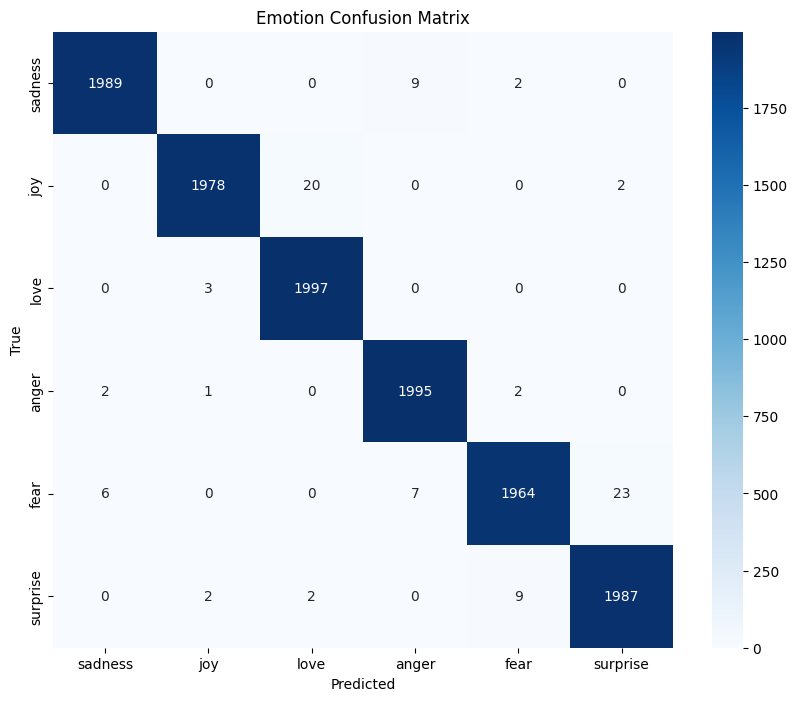

In [957]:
plot_confusion_matrix(emotion_labels, emotion_pred, 'Emotion Confusion Matrix', emotion_labels_text)

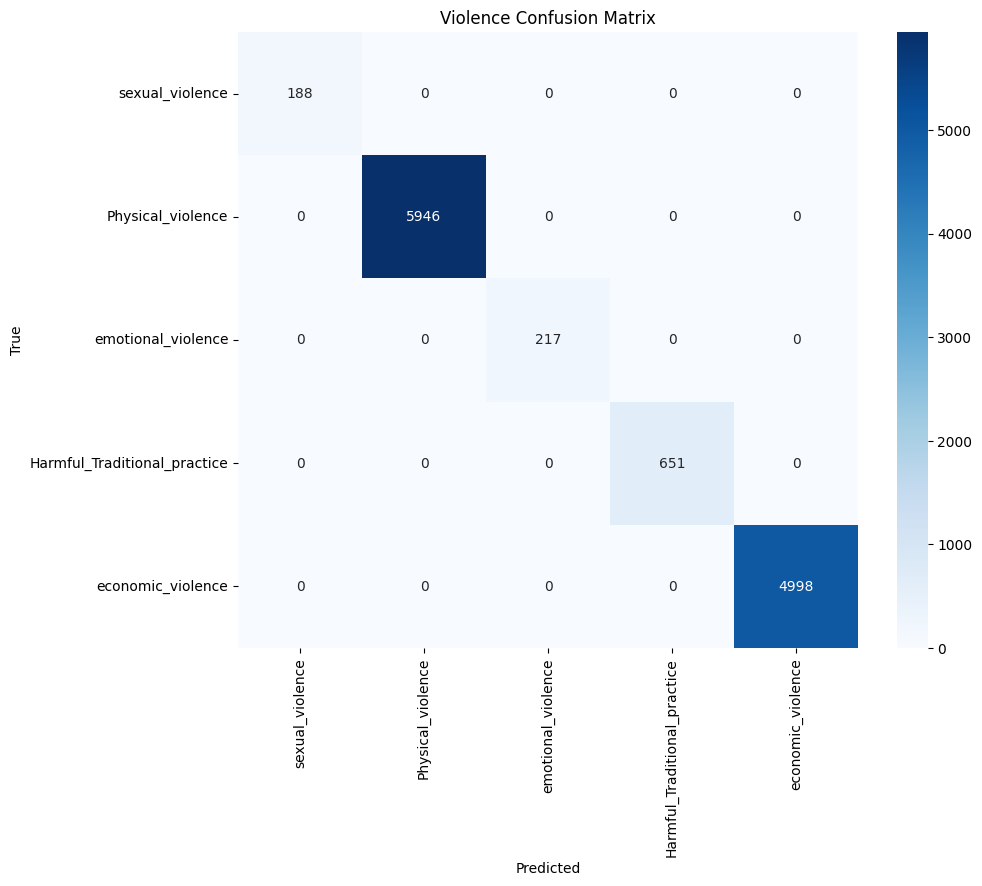

In [958]:
plot_confusion_matrix(violence_labels, violence_pred, 'Violence Confusion Matrix', violence_labels_text)

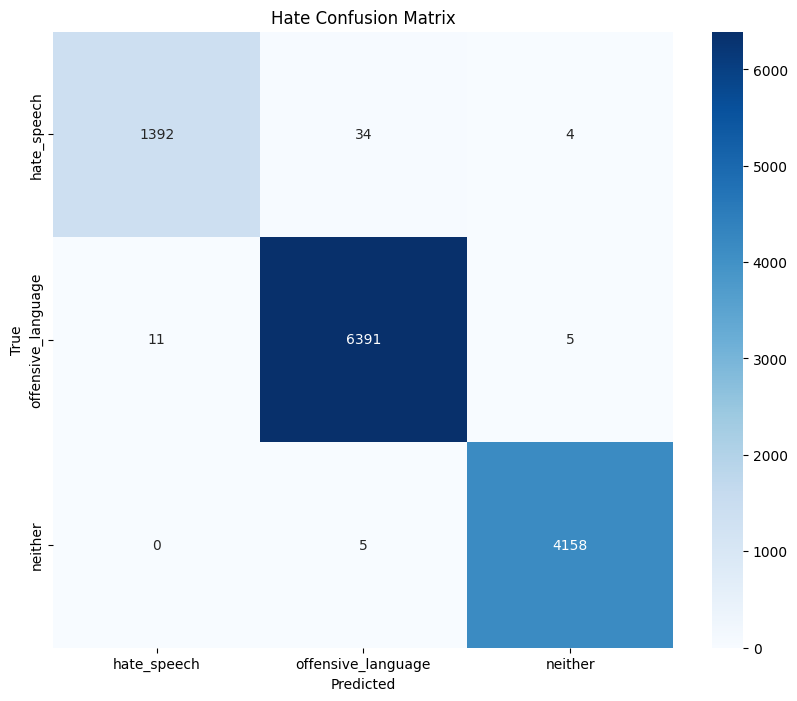

In [959]:
plot_confusion_matrix(hate_labels, hate_pred, 'Hate Confusion Matrix', hate_labels_text)

In [960]:
def classify_text(input_text):
  input_text_cleaned=remove_stopwords(input_text)
  input_sequence=tokenizer.texts_to_sequences([input_text_cleaned])
  input_padded=pad_sequences(input_sequence,maxlen=max_length,padding='post')

  predictions= model.predict({'emotion_input': input_padded,
               'violence_input': input_padded,
               'hate_input': input_padded})

  emotion_pred=np.argmax(predictions[0], axis=1)[0]
  violence_pred=np.argmax(predictions[1], axis=1)[0]
  hate_pred=np.argmax(predictions[2], axis=1)[0]

  major_labels=['Emotions','Violence','Hate']
  major_labels_index=np.argmax([np.max(predictions[0]),np.max(predictions[1]),np.max(predictions[2])])
  major_label=major_labels[major_labels_index]

  emotion_labels_text= ['sadness','joy','love','anger','fear','surprise']
  violence_labels_text= ['sexual_violence','Physical_violence','emotional_violence','Harmful_Traditional_practice','economic_violence']
  hate_labels_text= ['hate_speech','offensive_language','neither']


  if major_label=="Emotion":
    sub_label=emotion_labels_text[emotion_pred]
  elif major_label=="Violence":
    sub_label=violence_labels_text[violence_pred]
  else:
    sub_label=hate_labels_text[hate_pred]

  return major_label, sub_label

In [961]:
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display

In [962]:
!pip install ipywidgets

In [963]:
input_text_widget=widgets.Text(
    description ='Input Text:',
    placeholder = 'Enter your text'
)

In [964]:
button=widgets.Button(description='Classify')
output=widgets.Output()

In [965]:
def on_button_click(b):
  with output:
    output.clear_output()
    input_text=input_text_widget.value
    major_label, sub_label= classify_text(input_text)
    print(f'Major Label: {major_label}')
    print(f'Sub Label: {sub_label}')

  button.on_click(on_button_click)

In [969]:
import ipywidgets as widgets
from IPython.display import display
from google.colab import output
output.enable_custom_widget_manager()

# Create widgets
input_text_widget = widgets.Text(
    value='',
    placeholder='Type something...',
    description='Input:',
    disabled=False
)

button = widgets.Button(description="Submit")
output_area = widgets.Output()

# Define callback
def on_button_click(b):
    with output_area:
        output_area.clear_output()
        input_text = input_text_widget.value
        major_label, sub_label = classify_text(input_text)
        print(f'Major Label: {major_label}')
        print(f'Sub Label: {sub_label}')

# Register callback only once (outside the function)
button.on_click(on_button_click)

# Display UI
display(input_text_widget, button, output_area)


Text(value='', description='Input:', placeholder='Type something...')

Button(description='Submit', style=ButtonStyle())

Output()

In [967]:
print("violence_pred:", violence_pred, type(violence_pred))


violence_pred: [1 1 1 ... 4 4 4] <class 'numpy.ndarray'>
